# Generating step data

In [1]:
import random as r
%matplotlib inline
import numpy as np
import math as m
import matplotlib.pyplot as plt

In [2]:
days = 3
hours = days*24
time = []
power = []
randTime = []
randPower = []

length t2: 121  length absT2: 121
length of t3: 121
102.0 hrs
80.5505645351 hrs


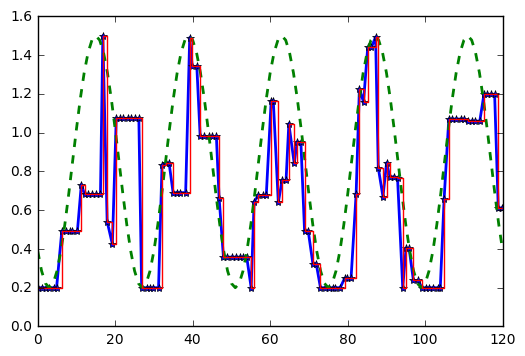

In [3]:
def powerLoadR(t):
    rf = r.uniform(0,1)
    p = .65*m.sin((2*m.pi/24)*(t + 15)) + rf
    if p < .2: p = .2
    return p

def powerLoad(t):
    #rf = r.uniform(-1,1)
    return .65*m.sin((2*m.pi/24)*(t + 15)) + .85

time = []
t2 = []
power = []
powerRand = []

days = 5*24

for i in np.arange(0,days + 1):
    time.append(i)
    power.append(powerLoad(i))
    
    t2.append(i + r.uniform(-.2,.3)) # Randomized variation
    #t2.append(r.uniform(-.2,.3)) # Randomized variation for step data
    #if t2[0] < 0: t2[0] = 0 # For 1st time through
    
    hold = r.randint(0,1) # sometimes power is held
    if hold and len(powerRand) > 0: # if True
        powerRand.append(powerRand[-1])
    else:
        powerRand.append(powerLoadR(t2[-1]))
t2[0] = 0
absT2 = [0]
for i in range(1,len(t2)):
    absT2.append(t2[i] - t2[i-1])
print("length t2:",len(t2)," length absT2:", len(absT2))
t3 = [0]
for i in absT2[1:]:
    t3.append(i + t3[-1])
print("length of t3:",len(t3))
plt.plot(t3,powerRand,'-*',time, power, '--', linewidth=2)
#plt.step(t3, powerRand, label='pre (default)')
plt.step(t3, powerRand, where='post', label='post')
dashes = [10, 5, 100, 5]  # 10 points on, 5 off, 100 on, 5 off
#line.set_dashes(dashes)

print(np.trapz(power,x=time),"hrs")
print(np.trapz(powerRand,x=t2),"hrs")
plt.show()

absT2 # is post-Delta Time (delta time is current line minus previous line)

In [4]:
n = 15
dec = 4
with open('stepData.txt', 'w') as f:
    #read_data = f.read()
    #f.write('This is a test\nThis is another test\n')
    f.write('Delta Time (hr)'.ljust(n)+'   '+'Power (kW)'.ljust(n)+'\n')
    f.write('---------------'.ljust(n)+'   '+'----------'.ljust(n)+'\n')
    for i in range(len(absT2)): 
        f.write(str(round(absT2[i],dec)).ljust(n) + '   ' +\
                str(round(powerRand[i],dec)).ljust(n)\
                # + '   '\
                + "\n")
f.closed

True

For CSV data...

In [5]:
import csv
with open('stepData.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile,dialect='excel', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Delta Time (hr)'] + ['Power (kW)'])
    #spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])
    for i in range(len(absT2)): 
        spamwriter.writerow([str(round(absT2[i],dec))] + [round(powerRand[i],dec)])
csvfile.closed

True

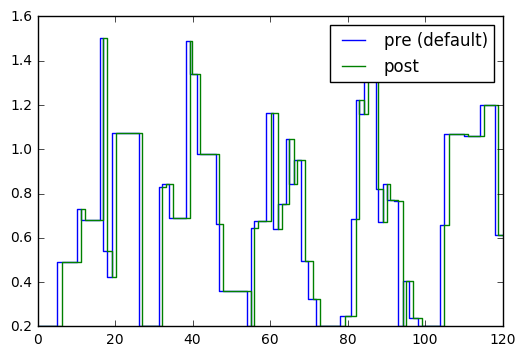

In [6]:
#import numpy as np
#from numpy import ma
#import matplotlib.pyplot as plt

# x = np.arange(1, 7, 0.4)
# y0 = np.sin(x)
# y = y0.copy() + 2.5

plt.step(t3, powerRand, label='pre (default)')

# y -= 0.5
# plt.step(x, y, where='mid', label='mid')

# y -= 0.5
plt.step(t3, powerRand, where='post', label='post')

# y = ma.masked_where((y0 > -0.15) & (y0 < 0.15), y - 0.5)
# plt.step(x, y, label='masked (pre)')

plt.legend()

# plt.xlim(0, 7)
# plt.ylim(-0.5, 4)

plt.show()